In [6]:
# Packages
library(ggplot2)  # visualization
library(dplyr)    # data manipulation


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [7]:
# Read the dataset and load it to a data frame
file_path <- "/content/CreditCardFraud_Dataset-4.csv"
df <- read.csv(file_path)
# Data transformations
df$MerchantID <- as.factor(df$MerchantID)         # Ensures proper grouping in plots/summaries
df$TransactionType <- as.factor(df$TransactionType)  # So ggplot doesn't treat it as text
df$Class <- factor(df$Class, levels = c("Normal", "Fraudulent"))  # So "Fraudulent" is the positive class

In [8]:
# Quartile information on transactions amount
summary(df$Amount)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0   256.0   505.0   550.2   761.0  4995.0 

In [9]:
# Variance for transactions amount
cat("Variance:", var(df$Amount))

Variance: 240969.7

In [10]:
# Standard deviation for transactions amount
cat("Standard Deviation:", sd(df$Amount), "\n")

Standard Deviation: 490.8867 


In [11]:
# Transaction amounts above mean value
mean_Amount <- mean(df$Amount, na.rm = TRUE)
nrow(filter(df,Amount > mean_Amount))

[1] 4520

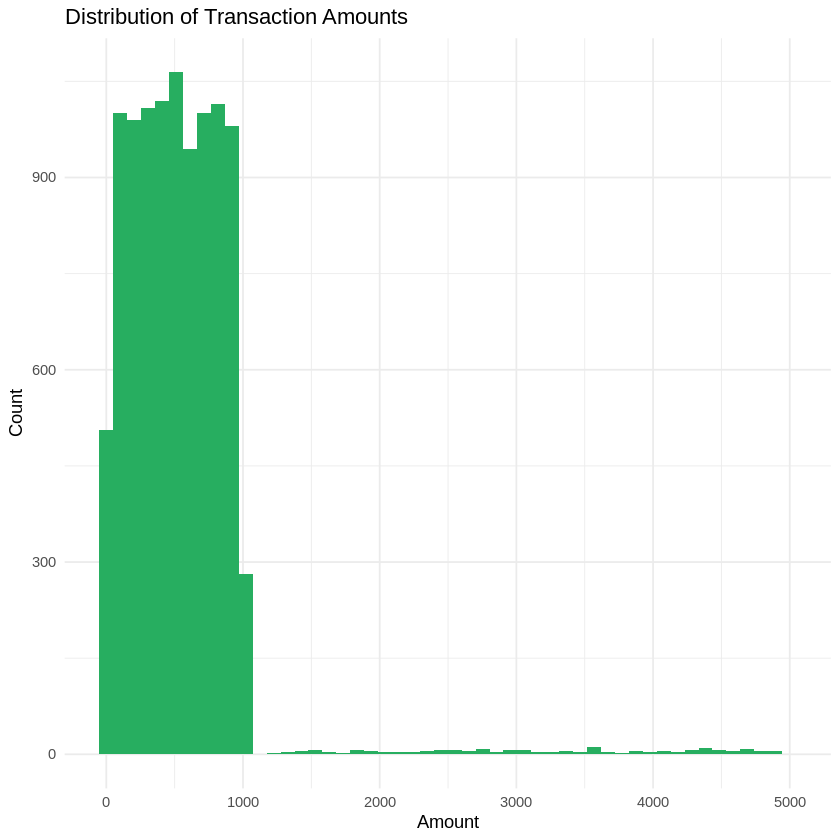

In [12]:
ggplot(df, aes(x = Amount)) +
  geom_histogram(bins = 50, fill = "#27AE60") +
  labs(title = "Distribution of Transaction Amounts", x = "Amount", y = "Count") +
  theme_minimal()

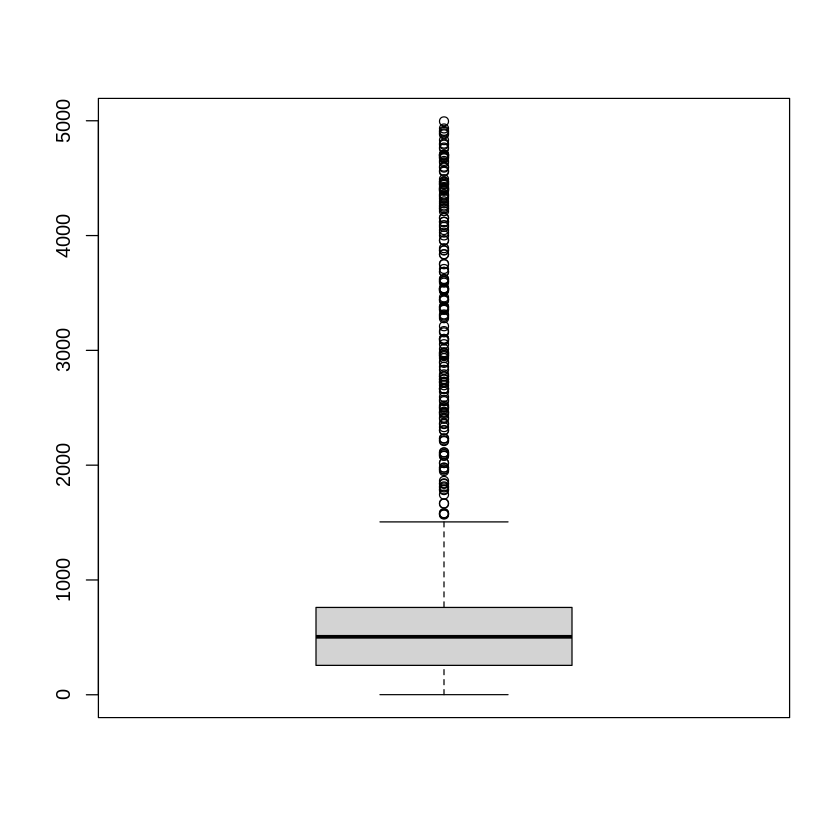

In [13]:
# Outlier Detection for Amount
boxplot(df$Amount)

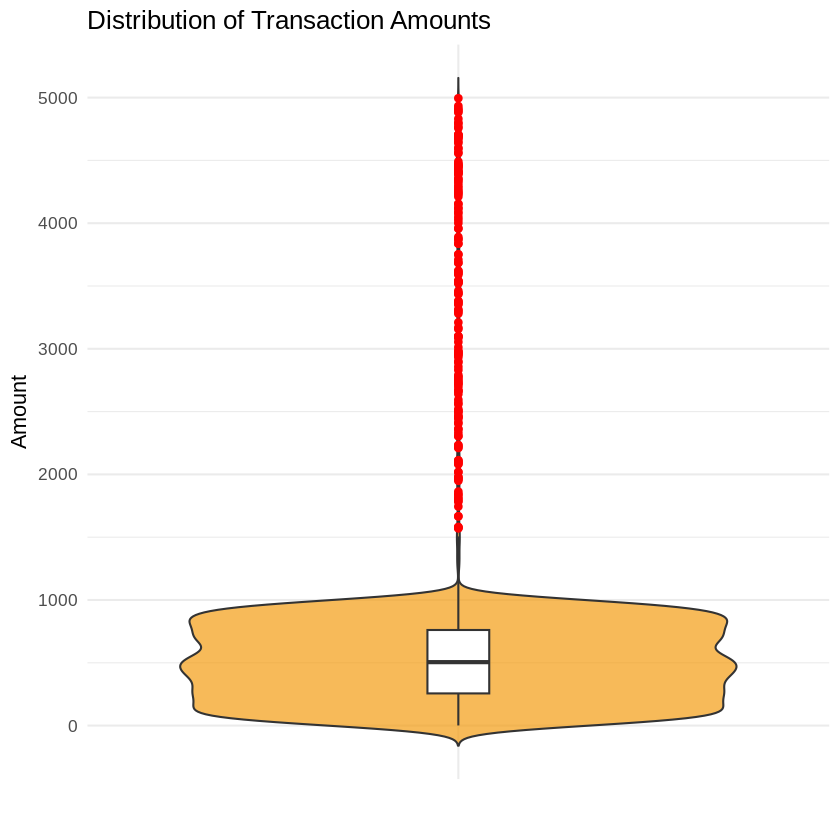

In [14]:
# Violin Plot
ggplot(df, aes(x = "", y = Amount)) +
  geom_violin(fill = "#F39C12", alpha = 0.7, trim = FALSE) +
  geom_boxplot(width = 0.1, outlier.color = "red") +
  labs(
    title = "Distribution of Transaction Amounts",
    x = "",
    y = "Amount"
  ) +
  theme_minimal(base_size = 13)

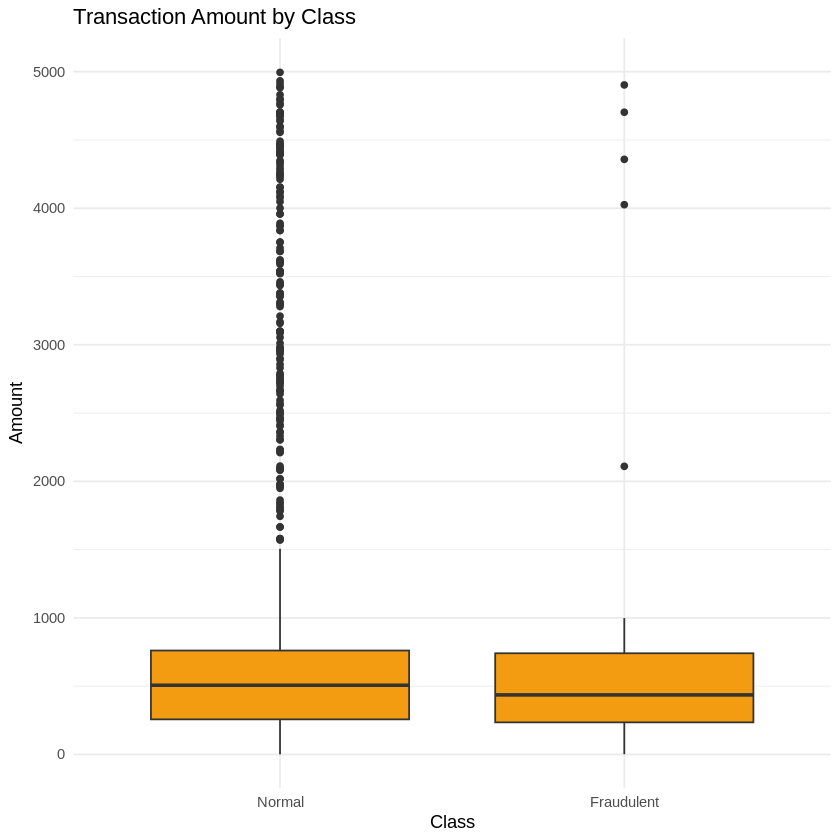

In [15]:
ggplot(df, aes(x = Class, y = Amount)) +
  geom_boxplot(fill = "#F39C12") +
  labs(title = "Transaction Amount by Class") +
  theme_minimal()

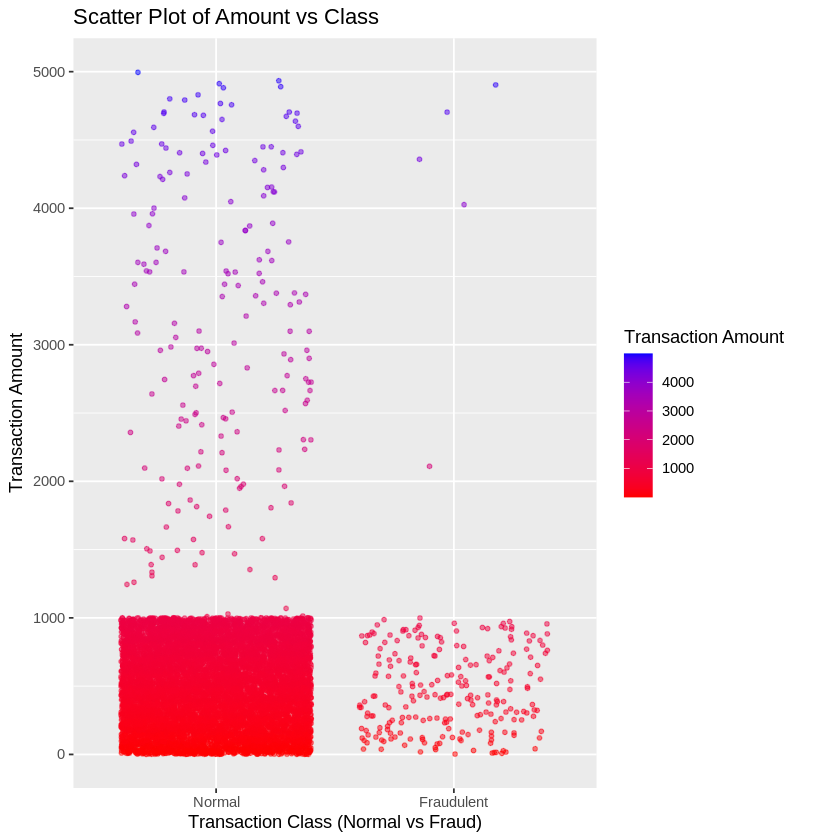

In [16]:
# Scatter Plot of Amount vs Class features
ggplot(df, aes(x = Class, y = Amount, color = Amount)) +
  geom_jitter(alpha = 0.5, size = 1) +
  scale_color_gradient(low = "red", high = "blue") +  # color mapping
  labs(title = "Scatter Plot of Amount vs Class",
       x = "Transaction Class (Normal vs Fraud)",
       y = "Transaction Amount",
       color = "Transaction Amount")

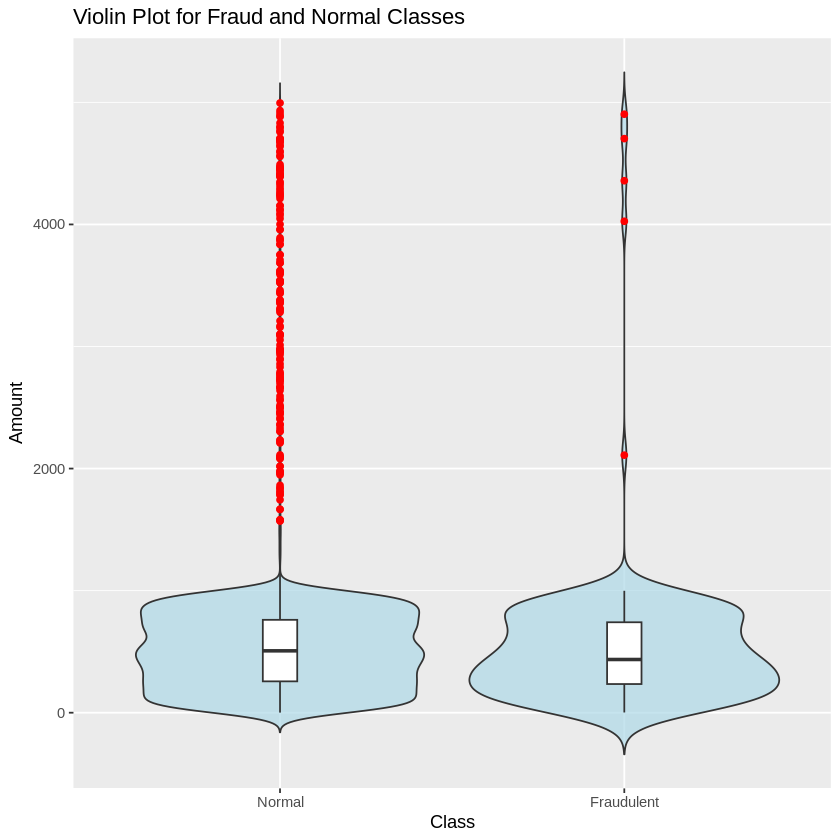

In [17]:
# Violin plots (with boxplot within) for transaction amounts and classes
ggplot(df, aes(x = as.factor(Class), y = Amount)) +
  geom_violin(trim = FALSE, fill = "lightblue", alpha = 0.7) +
  geom_boxplot(width = 0.1, outlier.color = "red") +
  labs(title = "Violin Plot for Fraud and Normal Classes", x = "Class",
  y = "Amount")
# What’s the shape of the violin plot? Is it a normal distribution?